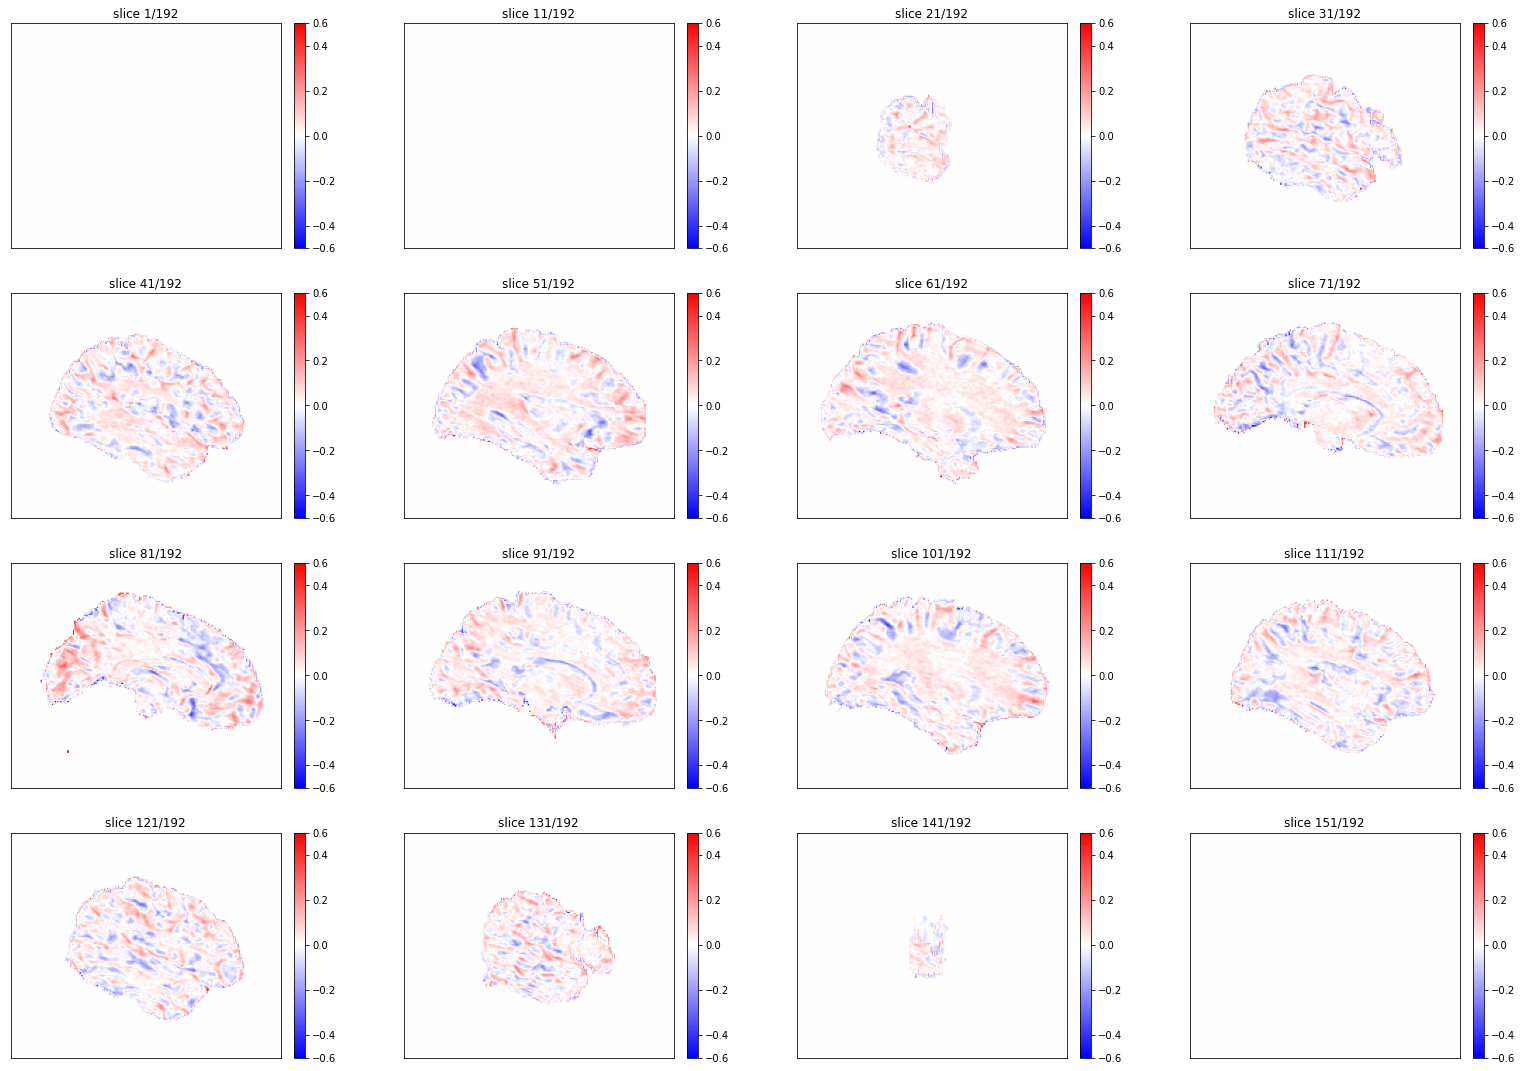

In [3]:
import matplotlib
%matplotlib inline
import matplotlib as mpl
from matplotlib import pylab as plt
import matplotlib.colors as mcolors
# matplotlib.use('TkAgg')  # If use this line, the show of image will generate a new window out of jupyter.

import numpy as np
import pylab

import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

pylab.rcParams['figure.figsize'] = (27.0, 24.0)

class MidpointNormalize(mpl.colors.Normalize):
    ## class from the mpl docs:
    # https://matplotlib.org/users/colormapnorms.html

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

example_filename = './fixed.nii.gz'  # fixed image
img1 = nib.load(example_filename)
# print(img1.header['db_name'])  # 输出头信息

example2_filename = './S11_warpped.nii.gz'  # warped image
# example2_filename = './S11.nii.gz'  # moving image
img2 = nib.load(example2_filename)
# print(img2.header['db_name'])  # 输出头信息

width, height, queue = img1.dataobj.shape
# OrthoSlicer3D(img.dataobj).show()

num = 1
for i in range(1, 160, 10):
#     img_arr1 = img1.dataobj[:, :, i]
#     img_arr2 = img2.dataobj[:, :, i]
    img_arr1 = img1.dataobj[i, :, :]
    img_arr2 = img2.dataobj[i, :, :]
    img_arr_diff = img_arr1 - img_arr2
    img_arr_diff = np.rot90(img_arr_diff, 1)
    plt.subplot(5, 4, num)
    plt.title('slice ' + str(i) + '/' + str(height))
    plt.imshow(img_arr_diff, cmap='bwr', norm=MidpointNormalize(midpoint=0))
    plt.clim(-0.5,0.5)
    plt.xticks([])
    plt.yticks([])
    
    plt.colorbar(fraction=0.046, pad=0.04)
    num += 1
# plt.show()
# plt.figure(figsize=(150,100))